In [124]:
import torch
import torchaudio
import requests
import matplotlib.pyplot as plt
from modulecpp3 import value

In [138]:
audio = "Train.wav"

In [126]:
wave,sample_rate1=torchaudio.load("Train.wav")

In [127]:
import numpy
waveform1 = value(audio)
waveform1 = numpy.array(waveform1)
print(waveform1)

2[[ 2.71606445e-03  6.34765625e-03  9.24682617e-03 ...  3.05175781e-05
   0.00000000e+00  0.00000000e+00]
 [-3.75366211e-03 -1.52587891e-03  1.31225586e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [128]:
wave_form1=torch.from_numpy(waveform1)
wave_form1= wave_form1.type(torch.FloatTensor)
print(wave_form1.size())
print(wave_form1.dtype)

torch.Size([2, 276858])
torch.float32


In [129]:
print("This is the shape of the waveform: {}".format(wave_form1.size()))
print("This is the output for Sample rate of the waveform: {}".format(sample_rate1))

This is the shape of the waveform: torch.Size([2, 276858])
This is the output for Sample rate of the waveform: 44100


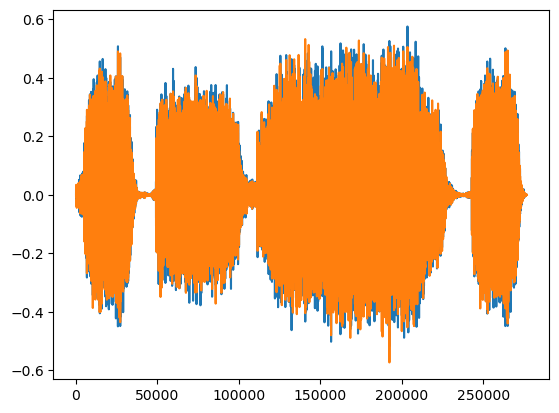

In [130]:
plt.figure()
plt.plot(wave_form1.t().numpy())

In [131]:
effects = [
    ["speed", "0.5"],  
    ["reverb", "-w"],  
    ]

In [132]:
waveform2,sample_rate2 = torchaudio.sox_effects.apply_effects_tensor(wave_form1,sample_rate1, effects)
print(wave_form1.shape, sample_rate1)
print(waveform2.shape, sample_rate2)

torch.Size([2, 276858]) 44100
torch.Size([2, 276858]) 22050


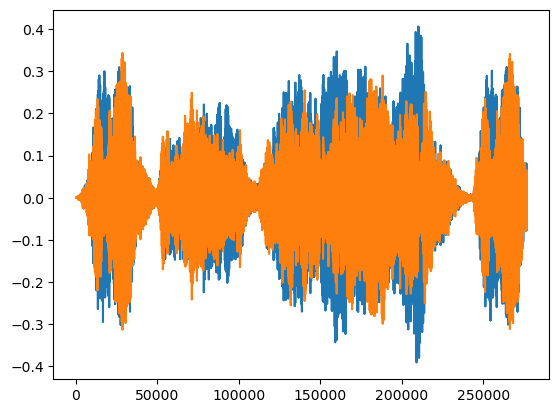

In [133]:
plt.figure()
plt.plot(waveform2.t().numpy())

In [134]:
from torchmetrics.audio.pesq import PerceptualEvaluationSpeechQuality
import torch
Pesq = PerceptualEvaluationSpeechQuality(8000, 'nb')
print(Pesq(waveform2,wave_form1))

tensor(2.3989)


In [135]:
from torchmetrics.audio.stoi import ShortTimeObjectiveIntelligibility
stoi = ShortTimeObjectiveIntelligibility(16000, False)
stoi(waveform2,wave_form1)

tensor(0.1320)